# Converting both SMILES in GCMS to canonical

In msp files inside comments index there are 2 SMILES indexes, this notebook converts both to canonical SMILES to test if both are the same

In [214]:
import os

module_root = os.path.join(os.path.dirname(os.getcwd()), "data")
spectrums_file = os.path.join(module_root, "MoNA-export-GC-MS-first10.msp")

### Loading the data from the msp file

In [215]:
from matchms.importing import load_from_msp

spectrums = load_from_msp(spectrums_file)

### Reading the data of one spectrum

In [216]:
from rdkit import Chem

data = []

for s in spectrums:
    temp = {
        "name": s.metadata.get("name"),
        "InChIKey": s.metadata.get("inchikey"),
        "smile_1": s.metadata.get("smiles"),
        "smile_2": s.metadata.get("smiles_2")
    }
    data.append(temp)

index = 3

print("name:", data[index]['name'])
print("InChIKey", data[index]['InChIKey'])

print(data[index]['smile_1'])
print(data[index]['smile_2'])

name: 2,5-DICHLOROPHENOL
InChIKey RANCECPPZPIPNO-UHFFFAOYSA-N
Oc(c1)c(Cl)ccc(Cl)1
[H]OC1=C([H])C(Cl)=C([H])C([H])=C1Cl


### Drawing the first SMILES of the spectrum

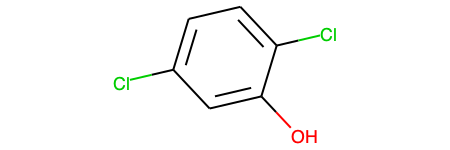

In [217]:
s1 = Chem.MolFromSmiles(data[index]['smile_1'])
s1

### Drawing the second SMILES of the spectrum

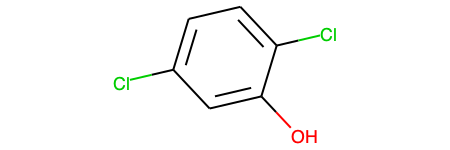

In [218]:
s2 = Chem.MolFromSmiles(data[index]['smile_2'])
s2

### Printing the SMILES once converted to canonical

In [219]:
from rdkit.Chem import rdMolHash

molhashf = rdMolHash.HashFunction.names

print("Canonical smiles of:", data[index]['name'] )
rdMolHash.MolHash(s1, molhashf.get("CanonicalSmiles"))

Canonical smile of: 2,5-DICHLOROPHENOL


'Oc1cc(Cl)ccc1Cl'

In [220]:
rdMolHash.MolHash(s2, molhashf.get("CanonicalSmiles"))

'Oc1cc(Cl)ccc1Cl'